# Fake News Detection Based on Headlines

In [594]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## Import Dataset

In [595]:
df = pd.read_csv('jml_aduan_berita_terpopuler__judul_berita_di_jabar_sab_data.csv')
df.head()

,id,kode_provinsi,nama_provinsi,judul_berita,klasifikasi_utama,klasifikasi_menyinggung,status_berita,bulan,jumlah_aduan,satuan,tahun
0,1,32,JAWA BARAT,RS HASAN SADIKIN BANDUNG ISOLASI PASIEN TERDUG...,0,0,BENAR,JANUARI,19,ADUAN,2020
1,2,32,JAWA BARAT,SELEBARAN BERLOGO POLDA METRO JAYA : WASPADA P...,0,0,DISINFORMASI (HOAKS),JANUARI,6,ADUAN,2020
2,3,32,JAWA BARAT,"ARTI HURUF ARAB PADA BUKU IQRA 1, CORONA DICIP...",0,0,DISINFORMASI (HOAKS),JANUARI,3,ADUAN,2020
3,4,32,JAWA BARAT,CIPANAS (PUNCAK) BARU SAJA DILANDA BANJIR BAND...,0,0,DISINFORMASI (HOAKS),JANUARI,3,ADUAN,2020
4,5,32,JAWA BARAT,"DITOLAK DI BERBAGAI NEGARA, RATUSAN TURIS CHIN...",0,0,BENAR,JANUARI,3,ADUAN,2020


In [596]:
df.shape

(361, 11)

In [597]:
df = df[['judul_berita', 'status_berita']]
df.head()

,judul_berita,status_berita
0,RS HASAN SADIKIN BANDUNG ISOLASI PASIEN TERDUG...,BENAR
1,SELEBARAN BERLOGO POLDA METRO JAYA : WASPADA P...,DISINFORMASI (HOAKS)
2,"ARTI HURUF ARAB PADA BUKU IQRA 1, CORONA DICIP...",DISINFORMASI (HOAKS)
3,CIPANAS (PUNCAK) BARU SAJA DILANDA BANJIR BAND...,DISINFORMASI (HOAKS)
4,"DITOLAK DI BERBAGAI NEGARA, RATUSAN TURIS CHIN...",BENAR


In [598]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   judul_berita   361 non-null    object
 1   status_berita  361 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB


In [599]:
df['status_berita'].value_counts()

status_berita
DISINFORMASI (HOAKS)    236
BENAR                    85
MISINFORMASI (HOAKS)     36
0                         4
Name: count, dtype: int64

In [600]:
filter0 = df[df['judul_berita'] == 0]

print(filter0)

Empty DataFrame
Columns: [judul_berita, status_berita]
Index: []


## EDA

In [601]:
df.describe()

,judul_berita,status_berita
count,361,361
unique,328,4
top,DAFTAR PRAKERJA MELALUI SITUS HTTPS://PRAKERJA...,DISINFORMASI (HOAKS)
freq,4,236


we can see if there is a duplicate data on judul_berita, so we must erase the duplicate value

In [602]:
duplicates = df[df.duplicated('judul_berita', keep=False)]
duplicate_counts = duplicates['judul_berita'].value_counts()

print("Duplicated values and their counts: \n")
print(duplicate_counts)

Duplicated values and their counts: 

judul_berita
DAFTAR PRAKERJA MELALUI SITUS HTTPS://PRAKERJA.VIP                                                                                         4
COVID-19 BISA DISEMBUHKAN DENGAN MINYAK KAYU PUTIH                                                                                         3
MUI PUSAT HIMBAU KIYAI DAN USTADZ AGAR TOLAK RAPID TEST, KARENA ITU MODUS OPERANDI PKI                                                     3
IMBAUAN DISDUKCAPIL BANDUNG TENTANG KASUS PENYALAHGUNAAN KTP                                                                               3
PEMERINTAH BERI INTERNET GRATIS AKIBAT CORONA VIRUS                                                                                        3
BROADCAST BSSN AKAN REKAM TELEPON DAN PANTAU WA, TWITTER, FACEBOOK                                                                         3
LINK SUBSIDI PULSA 200 RIBU DAN KUOTA 125 GB KEMENDIKBUD                                               

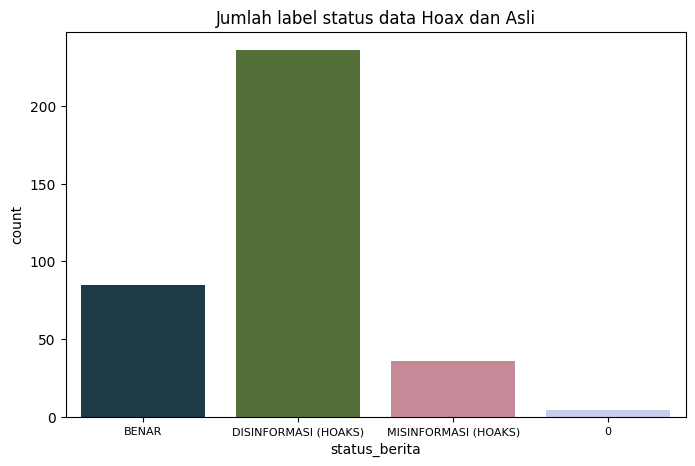

In [603]:
plt.figure(figsize = (8,5))
ax = sns.countplot(data = df,x = "status_berita", palette ='cubehelix')
plt.title("Jumlah label status data Hoax dan Asli")
ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=8)

plt.show()

Untuk mempermudah analisis kita akan menyamakan data disinformasi dan misinformasi karena intinya sama bahwa hal tersebut adalah hoaks

Serta menghapus data yang value tersebut ialah 0 pada status_berita

## Preprocessing

### Dropping Duplicated Data

In [604]:
df = df.drop_duplicates(subset='judul_berita')
df.describe()

,judul_berita,status_berita
count,328,328
unique,328,4
top,"DUBAI BERDUKA, TABRAKAN TRUK TANGKI DAN MENYEB...",DISINFORMASI (HOAKS)
freq,1,209


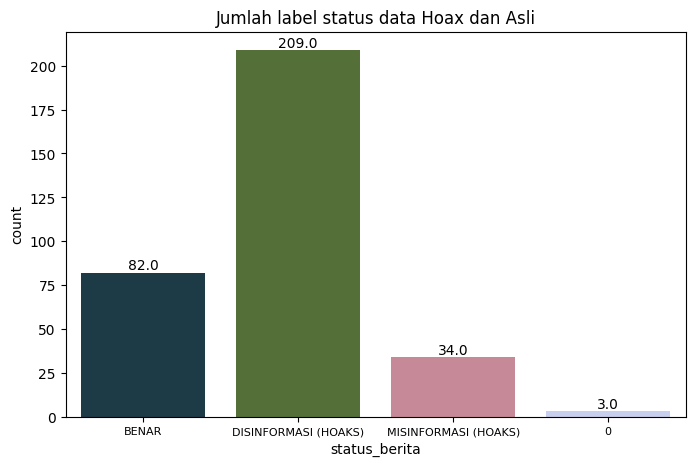

In [605]:
plt.figure(figsize = (8,5))
ax = sns.countplot(data = df,x = "status_berita", palette ='cubehelix')
plt.title("Jumlah label status data Hoax dan Asli")
ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=8)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

### Cleaning Null Data & Similar Hoax Name

In [606]:
df['status_berita'] = df['status_berita'].replace('MISINFORMASI (HOAKS)', 'DISINFORMASI (HOAKS)')
df = df[df['status_berita'] != '0']

df['status_berita'].unique()

array(['BENAR', 'DISINFORMASI (HOAKS)'], dtype=object)

### Counting The Length of Each News' Title

In [607]:
df['title_length'] = df['judul_berita'].apply(len)

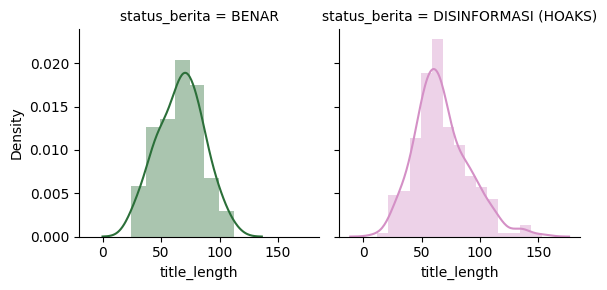

In [608]:
g = sns.FacetGrid(df, col='status_berita', hue='status_berita', palette='cubehelix')
g.map(sns.distplot, 'title_length')

As we can see, that actually status that is TRUE and HOAX has the same density on its title length which is between 50-100 characters. So, we don't need to match the character lengths.

But as we know, that there are different frequencies on the TRUE and HOAX data. So we should do some balancing preprocessing

### Outlier Handling with IQR Method

<Axes: xlabel='status_berita', ylabel='title_length'>

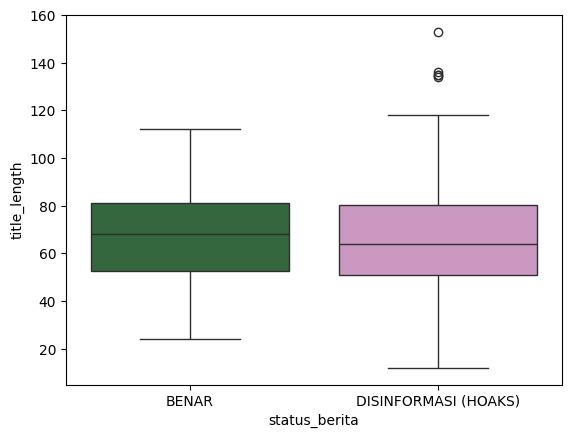

In [609]:
sns.boxplot(x='status_berita',y='title_length',data=df,palette='cubehelix')

In [610]:
# Only use the numeric column for outlier detection
Q1 = df['title_length'].quantile(0.25)
Q3 = df['title_length'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['title_length'] < lower_bound) | (df['title_length'] > upper_bound)]
filteredOutlier_df = df[(df['title_length'] >= lower_bound) & (df['title_length'] <= upper_bound)]

<Axes: xlabel='status_berita', ylabel='title_length'>

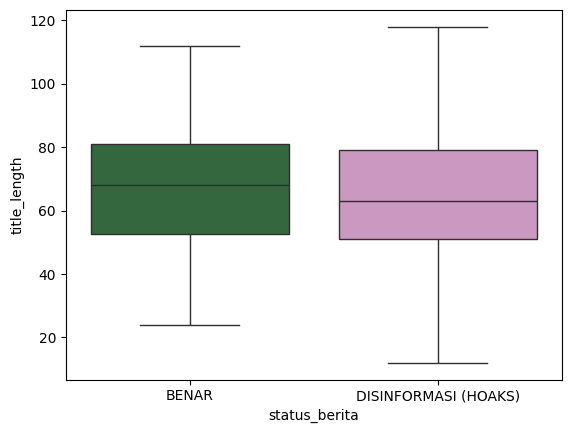

In [611]:
sns.boxplot(x='status_berita',y='title_length',data=filteredOutlier_df,palette='cubehelix')

As we can see that the outlier has now gone, so we can insert that outlier handling result to our DF

In [612]:
df = filteredOutlier_df

### Balancing Each Class using Resample

As we have not much amount of data we will use SMOTE to generate Syntethic Data that statistically similar to the existing data

In [613]:
from sklearn.utils import resample

In [614]:
df['status_berita'].value_counts()

status_berita
DISINFORMASI (HOAKS)    238
BENAR                    82
Name: count, dtype: int64

In [615]:
from sklearn.utils import resample

# Resample the classes with a lower n_samples
n_samples = min(len(df[df['status_berita'] == 'DISINFORMASI (HOAKS)']), len(df[df['status_berita'] == 'BENAR']))

df_hoax = resample(df[df['status_berita'] == 'DISINFORMASI (HOAKS)'], 
                   replace=True,    
                   n_samples=80,    
                   random_state=42)

df_true = resample(df[df['status_berita'] == 'BENAR'], 
                   replace=True,    
                   n_samples=80,    
                   random_state=42) 

# Combine
df = pd.concat([df_hoax, df_true])
df['status_berita'].value_counts()

status_berita
DISINFORMASI (HOAKS)    80
BENAR                   80
Name: count, dtype: int64

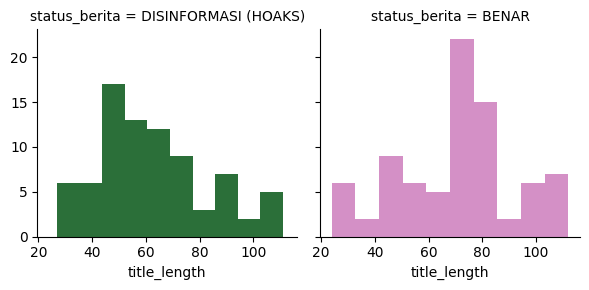

In [616]:
g = sns.FacetGrid(df, col='status_berita', hue='status_berita', palette='cubehelix')
g.map(plt.hist, 'title_length')

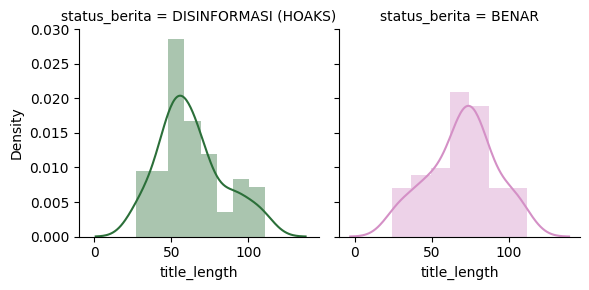

In [617]:
g = sns.FacetGrid(df, col='status_berita', hue='status_berita', palette='cubehelix')
g.map(sns.distplot, 'title_length')

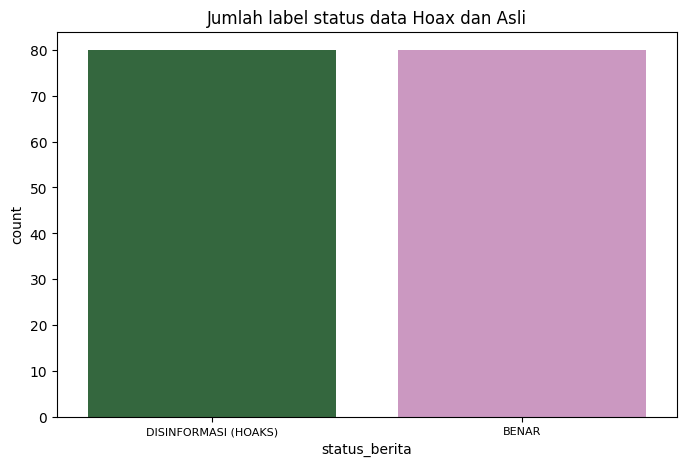

In [618]:
plt.figure(figsize = (8,5))
ax = sns.countplot(data = df,x = "status_berita", palette ='cubehelix')
plt.title("Jumlah label status data Hoax dan Asli")
ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=8)

plt.show()

### Preprocessing Text Data (NLP)

To analyze features in text such as emojis, links, hashtags, and more to determine their frequency of occurrence

In [619]:
import re
from collections import Counter

In [620]:
df['judul_berita'].unique()

array(['INFO AKAN ADA RAZIA GABUNGAN BESOK, KADAPATAN TAK PAKAI MASKER LANGSUNG DIDENDA RP 250.000',
       'CHINA MINTA PULAU KALIMANTAN SEBAGAI JAMINAN UTANG INDONESIA',
       'RAYAKAN ULANG TAHUN KFC TAWARKAN 3000 SNACK BUCKET UNTUK SEMUA ORANG',
       'VIDEO WARGA CHINA IKUT SHALAT GARA-GARA VIRUS CORONA',
       'JOKOWI TAK MAU DISUNTIK VAKSIN DULUAN',
       'HURRY UP AND GET FREE SHOES FROM ADIDAS',
       'BANTUAN KUOTA DATA INTERNET KEMENDIKBUD TAHUN 2021 SUBSIDI PULSA 200 RIBU DAN KUOTA 50 GB',
       'INFO PEMBUATAN SIM KOLEKTIF',
       'BRIGJEN HENDRA KURNIAWAN ADALAH ANAK KANDUNG PRESIDEN CINA XI JINPING',
       'ADA WALI ALLAH DI SURADE SUKABUMI',
       'VIDEO : 500 TON PISANG DARI SOMALIA TERKONTAMINASI CACING HELICOBACTER',
       'ADIDAS MENAWARKAN 3100 SEPATU GRATIS, T-SHIRT, DAN MASKER',
       'ADA VIDEO MENAG YAQUT CHOLIL QOUMAS DIBAPTIS PINDAH AGAMA',
       'BROADCAST BSSN AKAN REKAM TELEPON DAN PANTAU WA, TWITTER, FACEBOOK',
       'CAIRAN VAKSIN TIDAK MASU

In [621]:
def wordopt(text):
    text = text.lower() # text to lower text
    text = re.sub('\[.*?\]', '', text) # remove bracket
    #text = re.sub("\\W","",text) # remove symbol between text with space
    text = re.sub('https?://\S+|www\.\S+', '', text) # remove url
    text = re.sub('<.*?>+', '', text) # remove html tag
    text = ' '.join(re.sub('([&][A-Za-z0-9]+)|(\w+:\/\/\S+)',' ', text).split()) # remove html char
    text = re.sub(r'[^\w\s]', '', text) # remove punctuation
    text = re.sub('\n', '', text) # remove new line
    
    #text = re.sub('\w*\d\w*', '', text) # remove digits and word that related to digits
    return text

> under this line, is only for testing each wordopt function

In [622]:
# def wordopt2(text):
#     text = re.sub(r'[^\w\s]', '', text)  # Remove symbols/punctuation, replace with space
  
#     return text

In [623]:
# input_text = 'ADIDAS MENAWARKAN 3100 SEPATU GRATIS, T-SHIRT, DAN MASKER'
# processed_text = wordopt2(input_text)
# print(processed_text)

In [624]:
df["judul_berita"] = df["judul_berita"].apply(wordopt)

In [625]:
df['judul_berita'].unique()

array(['info akan ada razia gabungan besok kadapatan tak pakai masker langsung didenda rp 250000',
       'china minta pulau kalimantan sebagai jaminan utang indonesia',
       'rayakan ulang tahun kfc tawarkan 3000 snack bucket untuk semua orang',
       'video warga china ikut shalat garagara virus corona',
       'jokowi tak mau disuntik vaksin duluan',
       'hurry up and get free shoes from adidas',
       'bantuan kuota data internet kemendikbud tahun 2021 subsidi pulsa 200 ribu dan kuota 50 gb',
       'info pembuatan sim kolektif',
       'brigjen hendra kurniawan adalah anak kandung presiden cina xi jinping',
       'ada wali allah di surade sukabumi',
       'video  500 ton pisang dari somalia terkontaminasi cacing helicobacter',
       'adidas menawarkan 3100 sepatu gratis tshirt dan masker',
       'ada video menag yaqut cholil qoumas dibaptis pindah agama',
       'broadcast bssn akan rekam telepon dan pantau wa twitter facebook',
       'cairan vaksin tidak masuk ke tubu

### Tokenize Words

In [626]:
import nltk
from nltk.tokenize import word_tokenize 

In [627]:
def word_tokenize_wrapper(text):
    return word_tokenize(text)
    
def tokenize(word):
  word = word.split(" ")
  return word

In [628]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [629]:
import nltk
nltk.download('punkt_tab')

df['tokenized_title'] = df['judul_berita'].apply(word_tokenize_wrapper)
df.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,judul_berita,status_berita,title_length,tokenized_title
161,info akan ada razia gabungan besok kadapatan t...,DISINFORMASI (HOAKS),90,"[info, akan, ada, razia, gabungan, besok, kada..."
279,china minta pulau kalimantan sebagai jaminan u...,DISINFORMASI (HOAKS),60,"[china, minta, pulau, kalimantan, sebagai, jam..."
147,rayakan ulang tahun kfc tawarkan 3000 snack bu...,DISINFORMASI (HOAKS),68,"[rayakan, ulang, tahun, kfc, tawarkan, 3000, s..."
19,video warga china ikut shalat garagara virus c...,DISINFORMASI (HOAKS),52,"[video, warga, china, ikut, shalat, garagara, ..."
170,jokowi tak mau disuntik vaksin duluan,DISINFORMASI (HOAKS),37,"[jokowi, tak, mau, disuntik, vaksin, duluan]"


In [630]:
df = df.reset_index(drop=True)
df.head(3)

,judul_berita,status_berita,title_length,tokenized_title
0,info akan ada razia gabungan besok kadapatan t...,DISINFORMASI (HOAKS),90,"[info, akan, ada, razia, gabungan, besok, kada..."
1,china minta pulau kalimantan sebagai jaminan u...,DISINFORMASI (HOAKS),60,"[china, minta, pulau, kalimantan, sebagai, jam..."
2,rayakan ulang tahun kfc tawarkan 3000 snack bu...,DISINFORMASI (HOAKS),68,"[rayakan, ulang, tahun, kfc, tawarkan, 3000, s..."


### Stopwords (Removing insignificant words)

In [631]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [632]:
from nltk.corpus import stopwords

stopwords_id = stopwords.words('indonesian')

In [633]:
extra_stopword = pd.read_csv('stopwords_id_satya.txt', names= ['stopwords'], header = None)
stopwords_id.extend(extra_stopword["stopwords"][0].split(' '))
stopwords_id = set(stopwords_id)

In [634]:
def stopwords_removal(words):
    return [word for word in words if word not in stopwords_id]

In [635]:
df['tokenized_title_afterSW'] = df['tokenized_title'].apply(stopwords_removal)

In [636]:
df

,judul_berita,status_berita,title_length,tokenized_title,tokenized_title_afterSW
0,info akan ada razia gabungan besok kadapatan t...,DISINFORMASI (HOAKS),90,"[info, akan, ada, razia, gabungan, besok, kada...","[info, razia, gabungan, besok, kadapatan, paka..."
1,china minta pulau kalimantan sebagai jaminan u...,DISINFORMASI (HOAKS),60,"[china, minta, pulau, kalimantan, sebagai, jam...","[china, pulau, kalimantan, jaminan, utang, ind..."
2,rayakan ulang tahun kfc tawarkan 3000 snack bu...,DISINFORMASI (HOAKS),68,"[rayakan, ulang, tahun, kfc, tawarkan, 3000, s...","[rayakan, ulang, kfc, tawarkan, 3000, snack, b..."
3,video warga china ikut shalat garagara virus c...,DISINFORMASI (HOAKS),52,"[video, warga, china, ikut, shalat, garagara, ...","[video, warga, china, shalat, garagara, virus,..."
4,jokowi tak mau disuntik vaksin duluan,DISINFORMASI (HOAKS),37,"[jokowi, tak, mau, disuntik, vaksin, duluan]","[jokowi, disuntik, vaksin, duluan]"
...,...,...,...,...,...
155,surat edaran dirjen pelayanan kesehatan tentan...,BENAR,105,"[surat, edaran, dirjen, pelayanan, kesehatan, ...","[surat, edaran, dirjen, pelayanan, kesehatan, ..."
156,kecamatan cimaung kabupaten bandung zona merah...,BENAR,96,"[kecamatan, cimaung, kabupaten, bandung, zona,...","[kecamatan, cimaung, kabupaten, bandung, zona,..."
157,ade armando saya beragama islam tapi tidak pe...,BENAR,83,"[ade, armando, saya, beragama, islam, tapi, ti...","[ade, armando, beragama, islam, percaya, syari..."
158,bejat guru ngaji di depok cabuli 10 anak muridnya,BENAR,50,"[bejat, guru, ngaji, di, depok, cabuli, 10, an...","[bejat, guru, ngaji, depok, cabuli, 10, anak, ..."


### Stemming ( Transforming words to their original form)

In [637]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

In [638]:
df_normalized = pd.DataFrame(df['status_berita'])
df_normalized['judul_berita'] = df['judul_berita']

In [639]:
normalized_word = df_normalized

normalized_word_dict = {}

In [640]:
for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1]  

In [641]:
def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

In [642]:
df['normalized_title'] = df['tokenized_title_afterSW'].apply(normalized_term)

In [643]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [644]:
def stemmed_wrapper(term):
    return stemmer.stem(term)

In [645]:
term_dict = {}

for document in df['normalized_title']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

In [646]:
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")

630
------------------------
info : info
razia : razia
gabungan : gabung
besok : besok
kadapatan : kadapatan
pakai : pakai
masker : masker
langsung : langsung
didenda : denda
rp : rp
250000 : 250000
china : china
pulau : pulau
kalimantan : kalimantan
jaminan : jamin
utang : utang
indonesia : indonesia
rayakan : raya
ulang : ulang
kfc : kfc
tawarkan : tawar
3000 : 3000
snack : snack
bucket : bucket
orang : orang
video : video
warga : warga
shalat : shalat
garagara : garagara
virus : virus
corona : corona
jokowi : jokowi
disuntik : suntik
vaksin : vaksin
duluan : duluan
hurry : hurry
up : up
and : and
get : get
free : free
shoes : shoes
from : from
adidas : adidas
bantuan : bantu
kuota : kuota
data : data
internet : internet
kemendikbud : kemendikbud
2021 : 2021
subsidi : subsidi
pulsa : pulsa
200 : 200
ribu : ribu
50 : 50
gb : gb
pembuatan : buat
sim : sim
kolektif : kolektif
brigjen : brigjen
hendra : hendra
kurniawan : kurniawan
anak : anak
kandung : kandung
presiden : presiden
cina :

In [647]:
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['stemmed_title'] = df['normalized_title'].swifter.apply(get_stemmed_term)

Pandas Apply: 100%|██████████| 160/160 [00:00<00:00, 88897.69it/s]


In [648]:
df

,judul_berita,status_berita,title_length,tokenized_title,tokenized_title_afterSW,normalized_title,stemmed_title
0,info akan ada razia gabungan besok kadapatan t...,DISINFORMASI (HOAKS),90,"[info, akan, ada, razia, gabungan, besok, kada...","[info, razia, gabungan, besok, kadapatan, paka...","[info, razia, gabungan, besok, kadapatan, paka...","[info, razia, gabung, besok, kadapatan, pakai,..."
1,china minta pulau kalimantan sebagai jaminan u...,DISINFORMASI (HOAKS),60,"[china, minta, pulau, kalimantan, sebagai, jam...","[china, pulau, kalimantan, jaminan, utang, ind...","[china, pulau, kalimantan, jaminan, utang, ind...","[china, pulau, kalimantan, jamin, utang, indon..."
2,rayakan ulang tahun kfc tawarkan 3000 snack bu...,DISINFORMASI (HOAKS),68,"[rayakan, ulang, tahun, kfc, tawarkan, 3000, s...","[rayakan, ulang, kfc, tawarkan, 3000, snack, b...","[rayakan, ulang, kfc, tawarkan, 3000, snack, b...","[raya, ulang, kfc, tawar, 3000, snack, bucket,..."
3,video warga china ikut shalat garagara virus c...,DISINFORMASI (HOAKS),52,"[video, warga, china, ikut, shalat, garagara, ...","[video, warga, china, shalat, garagara, virus,...","[video, warga, china, shalat, garagara, virus,...","[video, warga, china, shalat, garagara, virus,..."
4,jokowi tak mau disuntik vaksin duluan,DISINFORMASI (HOAKS),37,"[jokowi, tak, mau, disuntik, vaksin, duluan]","[jokowi, disuntik, vaksin, duluan]","[jokowi, disuntik, vaksin, duluan]","[jokowi, suntik, vaksin, duluan]"
...,...,...,...,...,...,...,...
155,surat edaran dirjen pelayanan kesehatan tentan...,BENAR,105,"[surat, edaran, dirjen, pelayanan, kesehatan, ...","[surat, edaran, dirjen, pelayanan, kesehatan, ...","[surat, edaran, dirjen, pelayanan, kesehatan, ...","[surat, edar, dirjen, layan, sehat, manfaat, o..."
156,kecamatan cimaung kabupaten bandung zona merah...,BENAR,96,"[kecamatan, cimaung, kabupaten, bandung, zona,...","[kecamatan, cimaung, kabupaten, bandung, zona,...","[kecamatan, cimaung, kabupaten, bandung, zona,...","[camat, cimaung, kabupaten, bandung, zona, mer..."
157,ade armando saya beragama islam tapi tidak pe...,BENAR,83,"[ade, armando, saya, beragama, islam, tapi, ti...","[ade, armando, beragama, islam, percaya, syari...","[ade, armando, beragama, islam, percaya, syari...","[ade, armando, agama, islam, percaya, syariat,..."
158,bejat guru ngaji di depok cabuli 10 anak muridnya,BENAR,50,"[bejat, guru, ngaji, di, depok, cabuli, 10, an...","[bejat, guru, ngaji, depok, cabuli, 10, anak, ...","[bejat, guru, ngaji, depok, cabuli, 10, anak, ...","[bejat, guru, ngaji, depok, cabul, 10, anak, m..."


### Merged Stemmed Words

In [649]:
def merge_again(text):
    return ' '.join(text)

In [650]:
df['final_title'] = df['stemmed_title'].apply(merge_again)

In [651]:
df[['status_berita', 'final_title']].head(10)

,status_berita,final_title
0,DISINFORMASI (HOAKS),info razia gabung besok kadapatan pakai masker...
1,DISINFORMASI (HOAKS),china pulau kalimantan jamin utang indonesia
2,DISINFORMASI (HOAKS),raya ulang kfc tawar 3000 snack bucket orang
3,DISINFORMASI (HOAKS),video warga china shalat garagara virus corona
4,DISINFORMASI (HOAKS),jokowi suntik vaksin duluan
5,DISINFORMASI (HOAKS),hurry up and get free shoes from adidas
6,DISINFORMASI (HOAKS),bantu kuota data internet kemendikbud 2021 sub...
7,DISINFORMASI (HOAKS),info buat sim kolektif
8,DISINFORMASI (HOAKS),info razia gabung besok kadapatan pakai masker...
9,DISINFORMASI (HOAKS),brigjen hendra kurniawan anak kandung presiden...


## Create Model

In [652]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

### Encode the TRUE and HOAX to numerical

In [653]:
from sklearn.preprocessing import OneHotEncoder

In [654]:
encoder = OneHotEncoder()
df["status_berita"] = encoder.fit_transform(df[["status_berita"]]).toarray()
df.head()

,judul_berita,status_berita,title_length,tokenized_title,tokenized_title_afterSW,normalized_title,stemmed_title,final_title
0,info akan ada razia gabungan besok kadapatan t...,0.0,90,"[info, akan, ada, razia, gabungan, besok, kada...","[info, razia, gabungan, besok, kadapatan, paka...","[info, razia, gabungan, besok, kadapatan, paka...","[info, razia, gabung, besok, kadapatan, pakai,...",info razia gabung besok kadapatan pakai masker...
1,china minta pulau kalimantan sebagai jaminan u...,0.0,60,"[china, minta, pulau, kalimantan, sebagai, jam...","[china, pulau, kalimantan, jaminan, utang, ind...","[china, pulau, kalimantan, jaminan, utang, ind...","[china, pulau, kalimantan, jamin, utang, indon...",china pulau kalimantan jamin utang indonesia
2,rayakan ulang tahun kfc tawarkan 3000 snack bu...,0.0,68,"[rayakan, ulang, tahun, kfc, tawarkan, 3000, s...","[rayakan, ulang, kfc, tawarkan, 3000, snack, b...","[rayakan, ulang, kfc, tawarkan, 3000, snack, b...","[raya, ulang, kfc, tawar, 3000, snack, bucket,...",raya ulang kfc tawar 3000 snack bucket orang
3,video warga china ikut shalat garagara virus c...,0.0,52,"[video, warga, china, ikut, shalat, garagara, ...","[video, warga, china, shalat, garagara, virus,...","[video, warga, china, shalat, garagara, virus,...","[video, warga, china, shalat, garagara, virus,...",video warga china shalat garagara virus corona
4,jokowi tak mau disuntik vaksin duluan,0.0,37,"[jokowi, tak, mau, disuntik, vaksin, duluan]","[jokowi, disuntik, vaksin, duluan]","[jokowi, disuntik, vaksin, duluan]","[jokowi, suntik, vaksin, duluan]",jokowi suntik vaksin duluan


In [655]:
df[df['status_berita'] == 0]

,judul_berita,status_berita,title_length,tokenized_title,tokenized_title_afterSW,normalized_title,stemmed_title,final_title
0,info akan ada razia gabungan besok kadapatan t...,0.0,90,"[info, akan, ada, razia, gabungan, besok, kada...","[info, razia, gabungan, besok, kadapatan, paka...","[info, razia, gabungan, besok, kadapatan, paka...","[info, razia, gabung, besok, kadapatan, pakai,...",info razia gabung besok kadapatan pakai masker...
1,china minta pulau kalimantan sebagai jaminan u...,0.0,60,"[china, minta, pulau, kalimantan, sebagai, jam...","[china, pulau, kalimantan, jaminan, utang, ind...","[china, pulau, kalimantan, jaminan, utang, ind...","[china, pulau, kalimantan, jamin, utang, indon...",china pulau kalimantan jamin utang indonesia
2,rayakan ulang tahun kfc tawarkan 3000 snack bu...,0.0,68,"[rayakan, ulang, tahun, kfc, tawarkan, 3000, s...","[rayakan, ulang, kfc, tawarkan, 3000, snack, b...","[rayakan, ulang, kfc, tawarkan, 3000, snack, b...","[raya, ulang, kfc, tawar, 3000, snack, bucket,...",raya ulang kfc tawar 3000 snack bucket orang
3,video warga china ikut shalat garagara virus c...,0.0,52,"[video, warga, china, ikut, shalat, garagara, ...","[video, warga, china, shalat, garagara, virus,...","[video, warga, china, shalat, garagara, virus,...","[video, warga, china, shalat, garagara, virus,...",video warga china shalat garagara virus corona
4,jokowi tak mau disuntik vaksin duluan,0.0,37,"[jokowi, tak, mau, disuntik, vaksin, duluan]","[jokowi, disuntik, vaksin, duluan]","[jokowi, disuntik, vaksin, duluan]","[jokowi, suntik, vaksin, duluan]",jokowi suntik vaksin duluan
...,...,...,...,...,...,...,...,...
75,corona virus udah nyampe ke bandung di rshs ud...,0.0,102,"[corona, virus, udah, nyampe, ke, bandung, di,...","[corona, virus, udah, nyampe, bandung, rshs, u...","[corona, virus, udah, nyampe, bandung, rshs, u...","[corona, virus, udah, nyampe, bandung, rshs, u...",corona virus udah nyampe bandung rshs udah 1 p...
76,penutupan spbu sementara 12 juli 202117 juli 2021,0.0,50,"[penutupan, spbu, sementara, 12, juli, 202117,...","[penutupan, spbu, 12, juli, 202117, juli, 2021]","[penutupan, spbu, 12, juli, 202117, juli, 2021]","[tutup, spbu, 12, juli, 202117, juli, 2021]",tutup spbu 12 juli 202117 juli 2021
77,pesan berantai hasil rapat dengan dinas indag ...,0.0,92,"[pesan, berantai, hasil, rapat, dengan, dinas,...","[pesan, berantai, hasil, rapat, dinas, indag, ...","[pesan, berantai, hasil, rapat, dinas, indag, ...","[pesan, beranta, hasil, rapat, dinas, indag, k...",pesan beranta hasil rapat dinas indag kota ban...
78,partai prima buatan anakanak komunis,0.0,37,"[partai, prima, buatan, anakanak, komunis]","[partai, prima, buatan, anakanak, komunis]","[partai, prima, buatan, anakanak, komunis]","[partai, prima, buat, anakanak, komunis]",partai prima buat anakanak komunis


In [656]:
df[df['status_berita'] == 1]

,judul_berita,status_berita,title_length,tokenized_title,tokenized_title_afterSW,normalized_title,stemmed_title,final_title
80,guru di sukabumi jadi sasaran kemarahan perang...,1.0,81,"[guru, di, sukabumi, jadi, sasaran, kemarahan,...","[guru, sukabumi, sasaran, kemarahan, perangkat...","[guru, sukabumi, sasaran, kemarahan, perangkat...","[guru, sukabumi, sasar, marah, perangkat, desa...",guru sukabumi sasar marah perangkat desa gegar...
81,pengungkapan penjualan daging babi di kabupate...,1.0,55,"[pengungkapan, penjualan, daging, babi, di, ka...","[pengungkapan, penjualan, daging, babi, kabupa...","[pengungkapan, penjualan, daging, babi, kabupa...","[ungkap, jual, daging, babi, kabupaten, bandung]",ungkap jual daging babi kabupaten bandung
82,pemberitahuan penipuan pesan singkat berisi fo...,1.0,97,"[pemberitahuan, penipuan, pesan, singkat, beri...","[pemberitahuan, penipuan, pesan, singkat, beri...","[pemberitahuan, penipuan, pesan, singkat, beri...","[pemberitahuan, tipu, pesan, singkat, isi, for...",pemberitahuan tipu pesan singkat isi format is...
83,dr siti fadilah mantan menkes dan nidom gagal...,1.0,68,"[dr, siti, fadilah, mantan, menkes, dan, nidom...","[dr, siti, fadilah, mantan, menkes, nidom, gag...","[dr, siti, fadilah, mantan, menkes, nidom, gag...","[dr, siti, fadilah, mantan, menkes, nidom, gag...",dr siti fadilah mantan menkes nidom gagal herd...
84,terapkan psbb proporsional beberapa ruas jalan...,1.0,79,"[terapkan, psbb, proporsional, beberapa, ruas,...","[terapkan, psbb, proporsional, ruas, jalan, ko...","[terapkan, psbb, proporsional, ruas, jalan, ko...","[terap, psbb, proporsional, ruas, jalan, kota,...",terap psbb proporsional ruas jalan kota bandun...
...,...,...,...,...,...,...,...,...
155,surat edaran dirjen pelayanan kesehatan tentan...,1.0,105,"[surat, edaran, dirjen, pelayanan, kesehatan, ...","[surat, edaran, dirjen, pelayanan, kesehatan, ...","[surat, edaran, dirjen, pelayanan, kesehatan, ...","[surat, edar, dirjen, layan, sehat, manfaat, o...",surat edar dirjen layan sehat manfaat obat tra...
156,kecamatan cimaung kabupaten bandung zona merah...,1.0,96,"[kecamatan, cimaung, kabupaten, bandung, zona,...","[kecamatan, cimaung, kabupaten, bandung, zona,...","[kecamatan, cimaung, kabupaten, bandung, zona,...","[camat, cimaung, kabupaten, bandung, zona, mer...",camat cimaung kabupaten bandung zona merah cov...
157,ade armando saya beragama islam tapi tidak pe...,1.0,83,"[ade, armando, saya, beragama, islam, tapi, ti...","[ade, armando, beragama, islam, percaya, syari...","[ade, armando, beragama, islam, percaya, syari...","[ade, armando, agama, islam, percaya, syariat,...",ade armando agama islam percaya syariat islam ...
158,bejat guru ngaji di depok cabuli 10 anak muridnya,1.0,50,"[bejat, guru, ngaji, di, depok, cabuli, 10, an...","[bejat, guru, ngaji, depok, cabuli, 10, anak, ...","[bejat, guru, ngaji, depok, cabuli, 10, anak, ...","[bejat, guru, ngaji, depok, cabul, 10, anak, m...",bejat guru ngaji depok cabul 10 anak murid


- BENAR = 1
- HOAX = 0

### Create Split Test & Train

In [657]:
from sklearn.model_selection import train_test_split

In [658]:
x = df["judul_berita"]
y = df["status_berita"]

---

#### 80:20 split

In [659]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, shuffle=True)

In [660]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### Random Forest Classifier (RFC) Model

In [661]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [662]:
pred_RFC = RFC.predict(xv_test)

In [663]:
RFC.score(xv_test, y_test)

0.875

In [664]:
print("Accuracy score for RFC Model is: ", accuracy_score(y_test, pred_RFC) * 100, '%')

Accuracy score for RFC Model is:  87.5 %


In [665]:
print(classification_report(y_test, pred_RFC))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88        16
         1.0       0.88      0.88      0.88        16

    accuracy                           0.88        32
   macro avg       0.88      0.88      0.88        32
weighted avg       0.88      0.88      0.88        32



In [666]:
conf_mat = confusion_matrix(y_test, pred_RFC)

Text(0.5, 1.0, '\nResult w/ RFC Model\n')

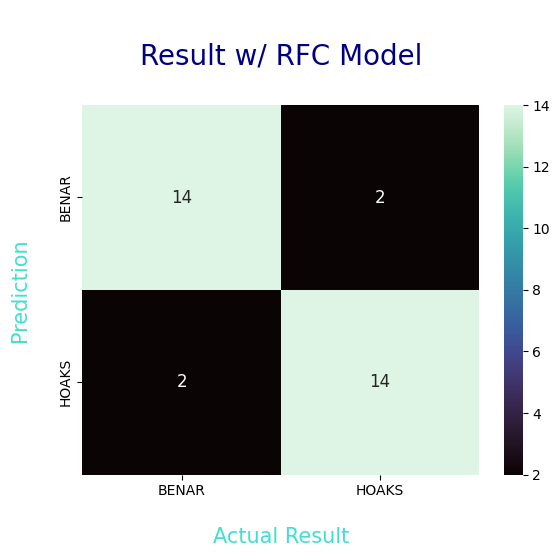

In [667]:
label = ['BENAR','HOAKS']
sns.heatmap(
    conf_mat, 
    xticklabels=label, 
    yticklabels=label, 
    fmt='d', 
    annot_kws={'size':12},
    annot = True,
    cmap = 'mako'
    )
plt.xlabel('\nActual Result', fontsize=15, color='turquoise')
plt.ylabel('Prediction\n', fontsize=15, color='turquoise')
plt.title('\nResult w/ RFC Model\n',  fontsize=20, color='navy')

---

#### 75:25 split

In [668]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1, shuffle=True)

In [669]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### Random Forest Classifier (RFC) Model

In [670]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [671]:
pred_RFC = RFC.predict(xv_test)

In [672]:
RFC.score(xv_test, y_test)

0.825

In [673]:
print("Accuracy score for RFC Model is: ", accuracy_score(y_test, pred_RFC) * 100, '%')

Accuracy score for RFC Model is:  82.5 %


In [674]:
print(classification_report(y_test, pred_RFC))

              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83        21
         1.0       0.80      0.84      0.82        19

    accuracy                           0.82        40
   macro avg       0.82      0.83      0.82        40
weighted avg       0.83      0.82      0.83        40



In [675]:
conf_mat = confusion_matrix(y_test, pred_RFC)

Text(0.5, 1.0, '\nResult w/ RFC Model\n')

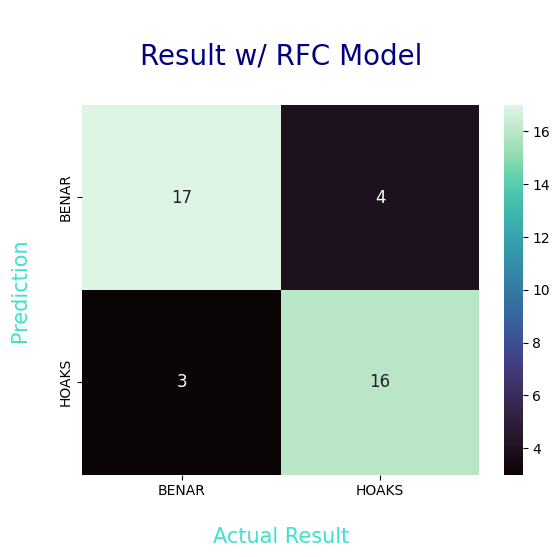

In [676]:
label = ['BENAR','HOAKS']
sns.heatmap(
    conf_mat, 
    xticklabels=label, 
    yticklabels=label, 
    fmt='d', 
    annot_kws={'size':12},
    annot = True,
    cmap = 'mako'
    )
plt.xlabel('\nActual Result', fontsize=15, color='turquoise')
plt.ylabel('Prediction\n', fontsize=15, color='turquoise')
plt.title('\nResult w/ RFC Model\n',  fontsize=20, color='navy')

---

#### 70:30 split

In [677]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, shuffle=True)

In [678]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### Random Forest Classifier

In [679]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, shuffle=True)

In [680]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [681]:
pred_RFC = RFC.predict(xv_test)

In [682]:
RFC.score(xv_test, y_test)

0.8541666666666666

In [683]:
print("Accuracy score for RFC Model is: ", accuracy_score(y_test, pred_RFC) * 100, '%')

Accuracy score for RFC Model is:  85.41666666666666 %


In [684]:
print(classification_report(y_test, pred_RFC))

              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85        24
         1.0       0.84      0.88      0.86        24

    accuracy                           0.85        48
   macro avg       0.85      0.85      0.85        48
weighted avg       0.85      0.85      0.85        48



In [685]:
conf_mat = confusion_matrix(y_test, pred_RFC)

Text(0.5, 1.0, '\nResult w/ RFC Model\n')

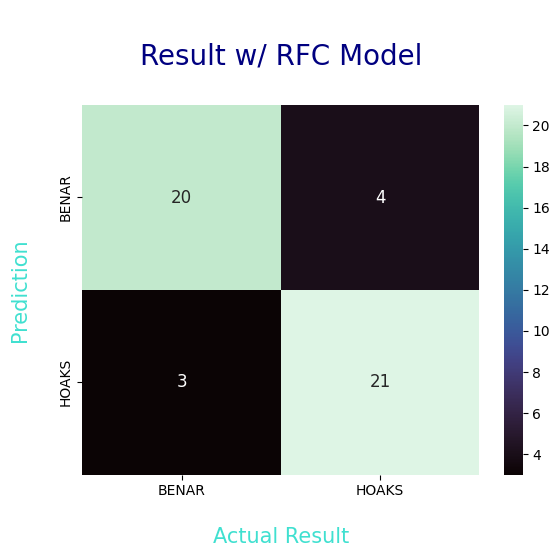

In [686]:
label = ['BENAR','HOAKS']
sns.heatmap(
    conf_mat, 
    xticklabels=label, 
    yticklabels=label, 
    fmt='d', 
    annot_kws={'size':12},
    annot = True,
    cmap = 'mako'
    )
plt.xlabel('\nActual Result', fontsize=15, color='turquoise')
plt.ylabel('Prediction\n', fontsize=15, color='turquoise')
plt.title('\nResult w/ RFC Model\n',  fontsize=20, color='navy')

---

We found out when we use the biggest train size (80:20) will produce the best model, which give accuracy score on 87.25% (in SVM, RFC, and XGBoost)

So we will continue using the 80:20 size and will do some Parameter Tuning on RFC model as it has the highest average score in all split train test size

## Parameter Tuning

In [687]:
from sklearn.model_selection import GridSearchCV

In [688]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, shuffle=True)

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [689]:
RFC = RandomForestClassifier(random_state=0)

In [690]:
# defining parameter range
param_grid = {
    'n_estimators': [10, 100, 200],
    'random_state': [0, 42, 123]
}

grid_search = GridSearchCV(RFC, param_grid, scoring='accuracy', verbose=3)

grid_search.fit(xv_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...n_estimators=10, random_state=0;, score=0.739 total time=   0.0s
[CV 2/5] END ...n_estimators=10, random_state=0;, score=0.783 total time=   0.0s
[CV 3/5] END ...n_estimators=10, random_state=0;, score=0.591 total time=   0.0s
[CV 4/5] END ...n_estimators=10, random_state=0;, score=0.636 total time=   0.0s
[CV 5/5] END ...n_estimators=10, random_state=0;, score=0.682 total time=   0.0s
[CV 1/5] END ..n_estimators=10, random_state=42;, score=0.565 total time=   0.0s
[CV 2/5] END ..n_estimators=10, random_state=42;, score=0.739 total time=   0.0s
[CV 3/5] END ..n_estimators=10, random_state=42;, score=0.636 total time=   0.0s
[CV 4/5] END ..n_estimators=10, random_state=42;, score=0.682 total time=   0.0s
[CV 5/5] END ..n_estimators=10, random_state=42;, score=0.682 total time=   0.0s
[CV 1/5] END .n_estimators=10, random_state=123;, score=0.739 total time=   0.1s
[CV 2/5] END .n_estimators=10, random_state=123;,

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'n_estimators': [10, 100, 200],
                         'random_state': [0, 42, 123]},
             scoring='accuracy', verbose=3)

In [691]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("\nBest Estimator:", best_estimator)

Best Parameters: {'n_estimators': 200, 'random_state': 42}

Best Estimator: RandomForestClassifier(n_estimators=200, random_state=42)


## Modelling After Tune

In [692]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, shuffle=True)

In [693]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [694]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=200, random_state=42)
RFC.fit(xv_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [695]:
pred_RFC = RFC.predict(xv_test)

In [696]:
RFC.score(xv_test, y_test)

0.875

In [697]:
print("Accuracy score for RFC Model is: ", accuracy_score(y_test, pred_RFC) * 100, '%')

Accuracy score for RFC Model is:  87.5 %


In [698]:
print(classification_report(y_test, pred_RFC))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88        16
         1.0       0.88      0.88      0.88        16

    accuracy                           0.88        32
   macro avg       0.88      0.88      0.88        32
weighted avg       0.88      0.88      0.88        32



In [699]:
conf_mat = confusion_matrix(y_test, pred_RFC)

Text(0.5, 1.0, '\nResult w/ RFC Model\n')

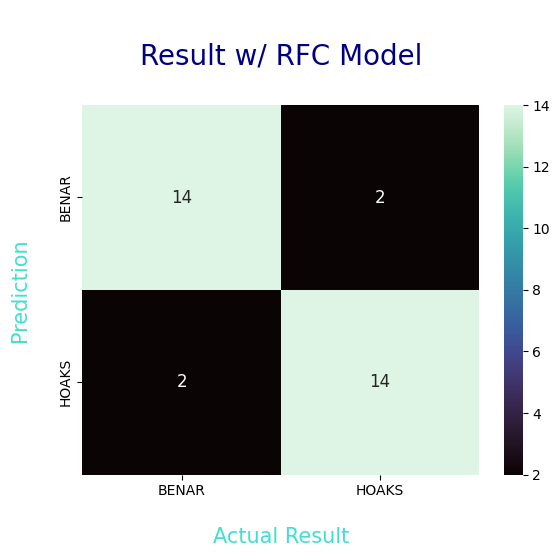

In [700]:
label = ['BENAR','HOAKS']
sns.heatmap(
    conf_mat, 
    xticklabels=label, 
    yticklabels=label, 
    fmt='d', 
    annot_kws={'size':12},
    annot = True,
    cmap = 'mako'
    )
plt.xlabel('\nActual Result', fontsize=15, color='turquoise')
plt.ylabel('Prediction\n', fontsize=15, color='turquoise')
plt.title('\nResult w/ RFC Model\n',  fontsize=20, color='navy')

it's just actually the same before as before tuning..

## Testing

In [701]:
def output_lable(n):
    if n == 0:
        return "HOAX"
    elif n == 1:
        return "BENAR"

def manual_testing(news):
    testing_news = {"judul_berita":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["judul_berita"] = new_def_test["judul_berita"].apply(wordopt)
    new_def_test["judul_berita"] = new_def_test["judul_berita"].apply(word_tokenize_wrapper)
    new_def_test["judul_berita"] = new_def_test["judul_berita"].apply(stopwords_removal)
    new_def_test["judul_berita"] = new_def_test["judul_berita"].apply(normalized_term)
    new_def_test["judul_berita"] = new_def_test["judul_berita"].swifter.apply(get_stemmed_term)
    new_def_test["judul_berita"] = new_def_test["judul_berita"].apply(merge_again)
    new_x_test = new_def_test["judul_berita"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_test = RFC.predict(new_xv_test)

    return print("\n\nPrediction with Random Forest Classifier: {}".format(output_lable(pred_test[0])))

#### Hasil ML akan diuji menggunakan judul berita dari https://opendata.jabarprov.go.id/id/dataset/jumlah-laporan-berita-vaksinisasi-berdasarkan-berita-populer-di-jabar-saber-hoaks

#### Berita 1

Input:
CAIRAN VAKSIN TIDAK MASUK KE TUBUH JOKOWI

In [702]:
news = str(input())

print('Jawaban dari ini harusnya HOAX')

manual_testing(news)

Jawaban dari ini harusnya HOAX


Pandas Apply: 100%|██████████| 1/1 [00:00<00:00, 1432.97it/s]



Prediction with Random Forest Classifier: HOAX


#### Berita 2

Input:
YANG SUDAH DIVAKSIN SIAP-SIAP MATI DINI DALAM JANGKA WAKTU 2 TAHUN

In [703]:
news = str(input())

print('Jawaban dari ini harusnya HOAX')

manual_testing(news)

Jawaban dari ini harusnya HOAX


Pandas Apply: 100%|██████████| 1/1 [00:00<00:00, 1364.89it/s]



Prediction with Random Forest Classifier: HOAX


#### Berita 2

Input:
PENTING! KEMENKES RI SIAGAKAN 19 DAERAH WASPADA VIRUS CORONA

In [705]:
news = str(input())

print('Jawaban dari ini harusnya BENAR')

manual_testing(news)

Jawaban dari ini harusnya BENAR


Pandas Apply: 100%|██████████| 1/1 [00:00<00:00, 956.29it/s]



Prediction with Random Forest Classifier: BENAR
